###Taylor Series

In [13]:
%pylab inline

import sympy
import numpy
from tabulate import tabulate
sympy.init_printing()


x = sympy.Symbol('x')

def taylor_series(F, center, degrees, left, right, y_buff=0.5, nums=[]):
    f_true = sympy.lambdify([x], F, 'numpy')
    x_vec = numpy.linspace(center-left, center+right, 500)
    y_true = f_true(x_vec)
    if len(nums) > 0:
        outTab = [nums,  f_true(nums)]
        headers = ["x", str(F)]

    plt.figure()
    plt.plot(x_vec,y_true)
    plt.axis([min(x_vec), max(x_vec), min(y_true)-y_buff, max(y_true) + y_buff])

    for i in degrees:
        P = F.series(x, x0=center, n=i+1).removeO()
        print ("Degree", i, "polynomial:", P)
        f_i = sympy.lambdify([x],P,'numpy')
        plt.plot(x_vec, f_i(x_vec))
        if len(nums) > 0:
            headers.append('P' + str(i) + '(x)')
            outTab.append(f_i(nums))

    plt.show()
    if len(nums) > 0: return outTab, headers
    

Populating the interactive namespace from numpy and matplotlib


###Overview
We covered linearization in Math 1A, where we could approximate the value of a function $f$ near a point $x$ with a line passing through $(x, f(x))$ with slope $f'(x)$. 

Degree 1 polynomial: x


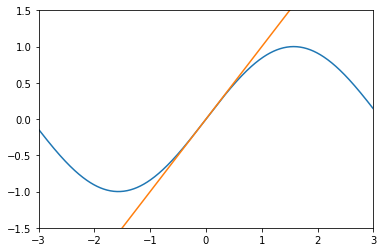

   x     sin(x)    P1(x)
----  ---------  -------
0     0             0
0.05  0.0499792     0.05
0.1   0.0998334     0.1
0.15  0.149438      0.15
0.2   0.198669      0.2


In [14]:
T, H = taylor_series(sympy.sin(x), 0, [1], 3, 3, 0.5, numpy.linspace(0,0.2,5))
print( tabulate(zip(*T), headers = H))

It stands to reason that by copying higher-order derivatives, we might be able to make better approximations of our function. Below are degree 3, 5, 7, and 9 approximations of sin(x). As the table below the plot shows, the approximations become quite good on the range $[0,1]$ by the time we get to the degree 9 polynomial. 

Degree 3 polynomial: -x**3/6 + x
Degree 5 polynomial: x**5/120 - x**3/6 + x
Degree 7 polynomial: -x**7/5040 + x**5/120 - x**3/6 + x
Degree 9 polynomial: x**9/362880 - x**7/5040 + x**5/120 - x**3/6 + x


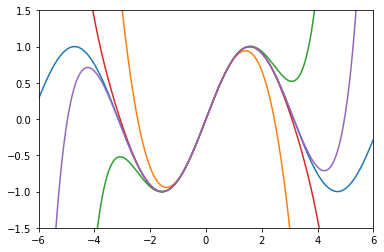

  x     sin(x)      P3(x)      P5(x)      P7(x)      P9(x)
---  ---------  ---------  ---------  ---------  ---------
0    0          0          0          0          0
0.1  0.0998334  0.0998333  0.0998334  0.0998334  0.0998334
0.2  0.198669   0.198667   0.198669   0.198669   0.198669
0.3  0.29552    0.2955     0.29552    0.29552    0.29552
0.4  0.389418   0.389333   0.389419   0.389418   0.389418
0.5  0.479426   0.479167   0.479427   0.479426   0.479426
0.6  0.564642   0.564      0.564648   0.564642   0.564642
0.7  0.644218   0.642833   0.644234   0.644218   0.644218
0.8  0.717356   0.714667   0.717397   0.717356   0.717356
0.9  0.783327   0.7785     0.783421   0.783326   0.783327
1    0.841471   0.833333   0.841667   0.841468   0.841471


In [15]:
T, H = taylor_series(sympy.sin(x), 0, [3,5,7,9], 6,6, 0.5, numpy.linspace(0,1,11))
print (tabulate(zip(*T), headers = H))

Seems pretty good! Let's see what happens when we try to use a really high-degree polynomial:

Degree 40 polynomial: -x**39/20397882081197443358640281739902897356800000000 + x**37/13763753091226345046315979581580902400000000 - x**35/10333147966386144929666651337523200000000 + x**33/8683317618811886495518194401280000000 - x**31/8222838654177922817725562880000000 + x**29/8841761993739701954543616000000 - x**27/10888869450418352160768000000 + x**25/15511210043330985984000000 - x**23/25852016738884976640000 + x**21/51090942171709440000 - x**19/121645100408832000 + x**17/355687428096000 - x**15/1307674368000 + x**13/6227020800 - x**11/39916800 + x**9/362880 - x**7/5040 + x**5/120 - x**3/6 + x


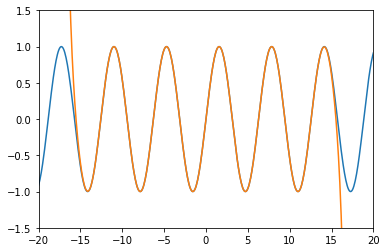

In [17]:
taylor_series(sympy.sin(x), 0, [40], 20, 20, 0.5)

###Note:
There are two properties sin(x) has that no polynomial can have: sin(x) is bounded, and sin(x) has infinitely many zeros. Regardless, it appears that by using higher and higher degree approximations, we can get polynomials that look a lot like sin(x) within a certain range. Furthermore, that range keeps expanding the higher we go. 

The same trick of copying derivatives can work for plenty of other functions as well, even if they look nothing like polynomials. Take $f(x) = e^{-x^2}$, which tends to zero as $x \rightarrow \pm \infty$. 

Degree 4 polynomial: x**4/2 - x**2 + 1
Degree 10 polynomial: -x**10/120 + x**8/24 - x**6/6 + x**4/2 - x**2 + 1
Degree 20 polynomial: x**20/3628800 - x**18/362880 + x**16/40320 - x**14/5040 + x**12/720 - x**10/120 + x**8/24 - x**6/6 + x**4/2 - x**2 + 1
Degree 30 polynomial: -x**30/1307674368000 + x**28/87178291200 - x**26/6227020800 + x**24/479001600 - x**22/39916800 + x**20/3628800 - x**18/362880 + x**16/40320 - x**14/5040 + x**12/720 - x**10/120 + x**8/24 - x**6/6 + x**4/2 - x**2 + 1


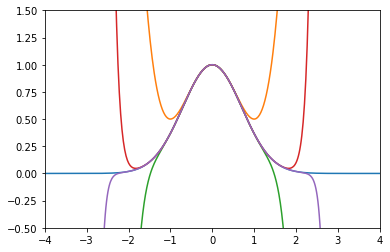

In [18]:
taylor_series(sympy.exp(-x**2), 0, [4, 10, 20, 30], 4,4, 0.5)

Or perhaps $e^x$, where you may be familiar with the power series representation 
$$ e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \ldots + \frac{x^n}{n!} + \ldots$$

Degree 3 polynomial: x**3/6 + x**2/2 + x + 1
Degree 4 polynomial: x**4/24 + x**3/6 + x**2/2 + x + 1
Degree 7 polynomial: x**7/5040 + x**6/720 + x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1
Degree 10 polynomial: x**10/3628800 + x**9/362880 + x**8/40320 + x**7/5040 + x**6/720 + x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1
Degree 13 polynomial: x**13/6227020800 + x**12/479001600 + x**11/39916800 + x**10/3628800 + x**9/362880 + x**8/40320 + x**7/5040 + x**6/720 + x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1


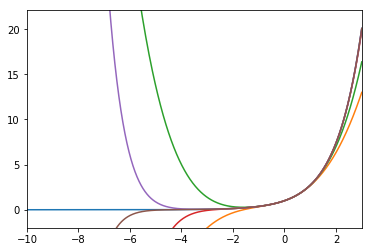

In [19]:
taylor_series(sympy.exp(x), 0, [3, 4, 7, 10, 13], 10, 3, 2)

###Then things go badly
But then we try to approximate $P(x) \approx 1/x$ near $x = 1$, and all of a sudden something goes wrong. We couldn't possibly expect the polynomial to be a good approximation for $x < 0$, but right around $x = 2$ the polynomials all start to diverge from $1/x$. 

Degree 5 polynomial: -x - (x - 1)**5 + (x - 1)**4 - (x - 1)**3 + (x - 1)**2 + 2
Degree 10 polynomial: -x + (x - 1)**10 - (x - 1)**9 + (x - 1)**8 - (x - 1)**7 + (x - 1)**6 - (x - 1)**5 + (x - 1)**4 - (x - 1)**3 + (x - 1)**2 + 2
Degree 15 polynomial: -x - (x - 1)**15 + (x - 1)**14 - (x - 1)**13 + (x - 1)**12 - (x - 1)**11 + (x - 1)**10 - (x - 1)**9 + (x - 1)**8 - (x - 1)**7 + (x - 1)**6 - (x - 1)**5 + (x - 1)**4 - (x - 1)**3 + (x - 1)**2 + 2


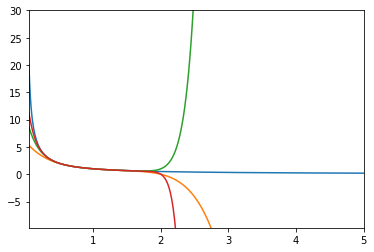

In [20]:
taylor_series(1/x, 1, [5, 10, 15], 0.95, 4, 10)

Alright, maybe we just weren't trying hard enough. A degree 50 polynomial should do the trick, right? 

Degree 50 polynomial: -x + (x - 1)**50 - (x - 1)**49 + (x - 1)**48 - (x - 1)**47 + (x - 1)**46 - (x - 1)**45 + (x - 1)**44 - (x - 1)**43 + (x - 1)**42 - (x - 1)**41 + (x - 1)**40 - (x - 1)**39 + (x - 1)**38 - (x - 1)**37 + (x - 1)**36 - (x - 1)**35 + (x - 1)**34 - (x - 1)**33 + (x - 1)**32 - (x - 1)**31 + (x - 1)**30 - (x - 1)**29 + (x - 1)**28 - (x - 1)**27 + (x - 1)**26 - (x - 1)**25 + (x - 1)**24 - (x - 1)**23 + (x - 1)**22 - (x - 1)**21 + (x - 1)**20 - (x - 1)**19 + (x - 1)**18 - (x - 1)**17 + (x - 1)**16 - (x - 1)**15 + (x - 1)**14 - (x - 1)**13 + (x - 1)**12 - (x - 1)**11 + (x - 1)**10 - (x - 1)**9 + (x - 1)**8 - (x - 1)**7 + (x - 1)**6 - (x - 1)**5 + (x - 1)**4 - (x - 1)**3 + (x - 1)**2 + 2


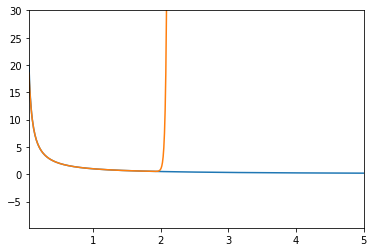

In [21]:
taylor_series(1/x, 1, [50], 0.95, 4, 10)

Wrong. We might guess that this has something to do with the fact that $1/x$ has a singularity at $x = 0$, so let's try $arctan(x)$ instead. It has horizontal asymptotes of $\pm \pi/2$, but at least it doesn't blow up anywhere like $1/x$ does. We'll cut to the chase: 

Degree 45 polynomial: x**45/45 - x**43/43 + x**41/41 - x**39/39 + x**37/37 - x**35/35 + x**33/33 - x**31/31 + x**29/29 - x**27/27 + x**25/25 - x**23/23 + x**21/21 - x**19/19 + x**17/17 - x**15/15 + x**13/13 - x**11/11 + x**9/9 - x**7/7 + x**5/5 - x**3/3 + x


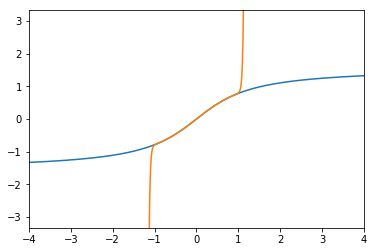

In [23]:
taylor_series(sympy.atan(x), 0, [45], 4,4, 2)

This is...unfortunate. But at least there are a few specific questions we can ask:
1. What does it mean, formally, for a sequence of functions to ''converge'' to another function?
2. Why does this trick of copying derivatives seem to work so well for $\sin(x)$ and $e^{x}$? 
3. Why does it fail so badly in for $1/x$ and $\arctan(x)$? 
4. How can we tell ahead of time whether our polynomials will converge to the function, or where they will converge? 

The next month of the course will (among other things) be aimed at answering these questions. 